/home/admin/SciCodes/nuMSM/nuMSM_solver/common.py:57: RuntimeWarning: overflow encountered in double_scalars
  return -1*((T*E_k)/Mpl)*np.exp(E_k/T)/((1 + np.exp(E_k/T))**2)


AveragedSolver; time (solve): 117.40018224716187, BAU = -3.5200484646738126e-09


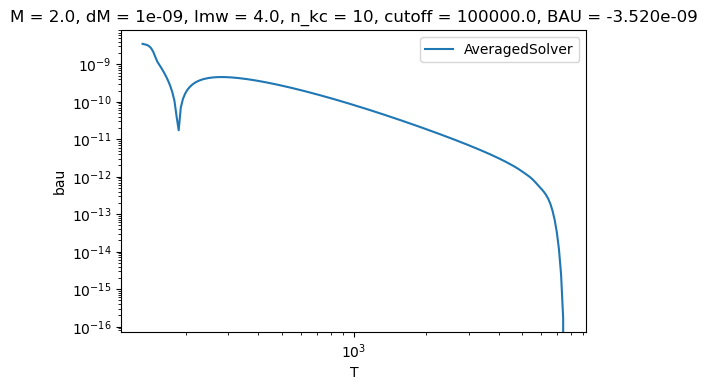

In [1]:
import matplotlib.pyplot as plt
import time

from nuMSM_solver.solvers import *
from nuMSM_solver.quadrature import TrapezoidalQuadrature, GaussianQuadrature
from nuMSM_solver.rates import Rates_Fortran, Rates_Jurai
from nuMSM_solver.common import zT, Tz

# Optimal phases
delta_opt = np.pi
eta_opt = (3.0*np.pi)/2.0
rew_opt = np.pi/4.0

# Model params
mp = ModelParams(M=2.0, dM=1e-9, Imw=4.0, Rew=rew_opt, delta=delta_opt, eta=eta_opt)

# Metaparams
H = 1
ode_pars = {'atol': 1e-15, 'rtol': 1e-6}
TF = Tsph
cutoff = 1e5

# Set up quadrature scheme and rates
n_kc = 10
kc_max = 10

# Hide annoying warning
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    quad = GaussianQuadrature(n_kc, 0, kc_max, qscheme="legendre")
    rates = Rates_Jurai(mp, H, quad.kc_list(), tot=False)

# Solve equations with AveragedSolver
avg_solver = AveragedSolver(rates_interface=rates, model_params=mp, TF=TF, H=H, cutoff=cutoff, eig_cutoff=False,
                           method="Radau", ode_pars=ode_pars, source_term=True)
start = time.time()
avg_solver.solve()
end = time.time()
avg_bau = (28./79.) * avg_solver.get_final_lepton_asymmetry()
print("AveragedSolver; time (solve): {}, BAU = {}".format(end - start, avg_bau))

title = "M = {}, dM = {}, Imw = {}, n_kc = {}, cutoff = {}, BAU = {:.3e}".format(
    mp.M, mp.dM, mp.Imw, n_kc, cutoff, avg_bau
)

fig = plt.figure(dpi=100)
fig.clear()
ax = fig.add_subplot(111)
plt.title(title)
plt.xlabel("T")
plt.ylabel("bau")
plt.xscale("log")
plt.yscale("log")
plt.plot(avg_solver.get_Tlist(), (28./79.) * np.abs(np.array(avg_solver.get_total_lepton_asymmetry())),
        label="AveragedSolver")
plt.legend()
plt.show()